In [1]:
from metadataclient.api import *
import time as ttime
import uuid
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

get_time = ttime.time


# Benchmark Script for retrieval of list of events

In [2]:
def benchmark_list_events(event_count,data_point_count):
    """Events are in listified form"""
    rs = insert_run_start(time=get_time(), scan_id=0, beamline_id='testing', uid=str(uuid.uuid4()), config={},
                        owner=None, group=None, project=None, custom=None)
    col_count = data_point_count
    data_keys = {}
    for i in range(col_count):
        data_keys['point_det' + str(i)] = dict(source='PV:ES:PointDet'+str(i), dtype='number',
                                                shape=1)
    e_desc = insert_descriptor(run_start=rs, data_keys=data_keys, 
                               time=get_time(), uid=str(uuid.uuid4()), custom=None)
    
    rands = np.random.RandomState(5)
    events = []
    num_exposures = event_count

    base_time = get_time()

    point_det_data = rands.randn(num_exposures) + np.arange(num_exposures)
    data = {}
    timestamps = {}
    all_events = []
    for i in range(1, num_exposures):
        time = float(2 * i + 0.5 * rands.randn()) + base_time
        for j in range(1, col_count):
            data['point_det'+str(j)] = point_det_data[i]
            timestamps['point_det'+str(j)] = time
        event_dict = dict(descriptor=e_desc, seq_num=i,
                          time=get_time(), data=data, timestamps=timestamps,
                          uid=str(uuid.uuid4()))
        
        all_events.append(event_dict)
    bulk_insert_events(event_descriptor=e_desc, events=all_events)
    rstop = insert_run_stop(run_start=rs, time=get_time(), uid=str(uuid.uuid4()), config={}, exit_status='success',
                        reason='', custom=None)
    start = get_time()
    a = list(find_events(descriptor=e_desc))
    end = get_time()
    
    elapsed = end - start
    
    return elapsed



# Benchmark Script for retrieval of event generator

In [3]:
def benchmark_events_generator(event_count,data_point_count):
    """Events are in generator form"""
    rs = insert_run_start(time=get_time(), scan_id=0, beamline_id='testing', uid=str(uuid.uuid4()), config={},
                        owner=None, group=None, project=None, custom=None)
    col_count = data_point_count
    data_keys = {}
    for i in range(col_count):
        data_keys['point_det' + str(i)] = dict(source='PV:ES:PointDet'+str(i), dtype='number',
                                                shape=1)
    e_desc = insert_descriptor(run_start=rs, data_keys=data_keys, 
                               time=get_time(), uid=str(uuid.uuid4()), custom=None)
    
    rands = np.random.RandomState(5)
    events = []
    num_exposures = event_count

    base_time = get_time()

    point_det_data = rands.randn(num_exposures) + np.arange(num_exposures)
    data = {}
    timestamps = {}
    all_events = []
    for i in range(1, num_exposures):
        time = float(2 * i + 0.5 * rands.randn()) + base_time
        for j in range(1, col_count):
            data['point_det'+str(j)] = point_det_data[j]
            timestamps['point_det'+str(j)] = time
        event_dict = dict(descriptor=e_desc, seq_num=i,
                          time=get_time(), data=data, timestamps=timestamps,
                          uid=str(uuid.uuid4()))
        
        all_events.append(event_dict)
    bulk_insert_events(event_descriptor=e_desc, events=all_events)
    rstop = insert_run_stop(run_start=rs, time=get_time(), uid=str(uuid.uuid4()), config={}, exit_status='success',
                        reason='', custom=None)
    start = get_time()
    a = find_events(descriptor=e_desc)
    end = get_time()
    
    elapsed = end - start
    
    return elapsed

# Benchmark Script for retrieval of list of events (Not bulk, single writes)

In [4]:
def benchmark_events_generator_single(event_count,data_point_count):
    """Events are in listified form"""
    rs = insert_run_start(time=get_time(), scan_id=0, beamline_id='testing', uid=str(uuid.uuid4()), config={},
                        owner=None, group=None, project=None, custom=None)
    col_count = data_point_count
    data_keys = {}
    for i in range(col_count):
        data_keys['point_det' + str(i)] = dict(source='PV:ES:PointDet'+str(i), dtype='number',
                                                shape=1)
    e_desc = insert_descriptor(run_start=rs, data_keys=data_keys, 
                               time=get_time(), uid=str(uuid.uuid4()), custom=None)
    
    rands = np.random.RandomState(5)
    events = []
    num_exposures = event_count

    base_time = get_time()

    point_det_data = rands.randn(num_exposures) + np.arange(num_exposures)
    data = {}
    timestamps = {}
    all_events = []
    
    time = float(2 * 1 + 0.5 * rands.randn()) + base_time
    for k in range(data_point_count):
        data['point_det'+str(k)] = point_det_data[0]
        timestamps['point_det'+str(k)] = time
    event_dict = dict(descriptor=e_desc, seq_num=0,
                      time=get_time(), data=data, timestamps=timestamps,
                      uid=str(uuid.uuid4()))
        
    for event in range(event_count):
        insert_event(**event_dict)
    rstop = insert_run_stop(run_start=rs, time=get_time(), uid=str(uuid.uuid4()), config={}, exit_status='success',
                        reason='', custom=None)
    start = get_time()
    a = find_events(descriptor=e_desc)
    end = get_time()
    
    elapsed = end - start
    
    return elapsed

# Benchmark Script for retrieval of event generator (Not bulk, single writes)

In [5]:
def benchmark_events_list_single(event_count,data_point_count):
    """Events are in listified form"""
    rs = insert_run_start(time=get_time(), scan_id=0, beamline_id='testing', uid=str(uuid.uuid4()), config={},
                        owner=None, group=None, project=None, custom=None)
    col_count = data_point_count
    data_keys = {}
    for i in range(1, col_count):
        data_keys['point_det' + str(i)] = dict(source='PV:ES:PointDet'+str(i), dtype='number',
                                                shape=1)
    e_desc = insert_descriptor(run_start=rs, data_keys=data_keys, 
                               time=get_time(), uid=str(uuid.uuid4()), custom=None)
    
    rands = np.random.RandomState(5)
    events = []
    num_exposures = event_count

    base_time = get_time()

    point_det_data = rands.randn(num_exposures) + np.arange(num_exposures)
    data = {}
    timestamps = {}
    all_events = []
    
    time = float(2 * 1 + 0.5 * rands.randn()) + base_time
    for k in range(data_point_count):
        data['point_det'+str(k)] = point_det_data[0]
        timestamps['point_det'+str(k)] = time
    event_dict = dict(descriptor=e_desc, seq_num=0,
                      time=get_time(), data=data, timestamps=timestamps,
                      uid=str(uuid.uuid4()))
        
    for event in range(1, event_count):
        insert_event(**event_dict)
    rstop = insert_run_stop(run_start=rs, time=get_time(), uid=str(uuid.uuid4()), config={}, exit_status='success',
                        reason='', custom=None)
    start = get_time()
    a = list(find_events(descriptor=e_desc))
    end = get_time()
    
    elapsed = end - start
    
    return elapsed

# Small quantity Event Retrieval Performance, Generator(10 scalar data pts/scan)

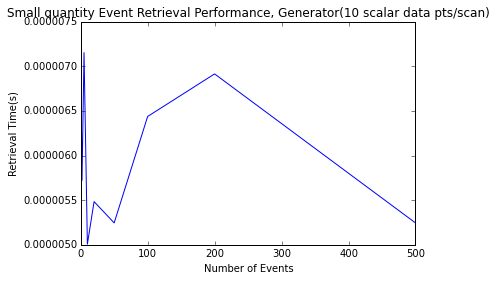

In [6]:
single_shot_range =  [1, 2, 5, 10, 20, 50, 100, 200, 500]
single_gen_time = []
for entry in single_shot_range:
    single_gen_time.append(benchmark_events_generator_single(entry, 10))
plt.plot(single_shot_range,  single_gen_time)
plt.xlabel('Number of Events')
plt.ylabel('Retrieval Time(s)')
plt.title('Small quantity Event Retrieval Performance, Generator(10 scalar data pts/scan)')

# Small quantity Event Retrieval Performance, List(10 scalar data pts/event)

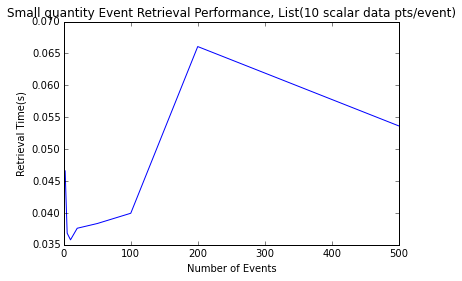

In [7]:
single_shot_range =  [2, 5, 10, 20, 50, 100, 200, 500]
single_gen_time = []
for entry in single_shot_range:
    single_gen_time.append(benchmark_events_list_single(entry, 10))
plt.plot(single_shot_range,  single_gen_time)
plt.xlabel('Number of Events')
plt.ylabel('Retrieval Time(s)')
plt.title('Small quantity Event Retrieval Performance, List(10 scalar data pts/event)')

# Large Quantity Event Retrieval Performance, Generator (10 scalar data pts/event)

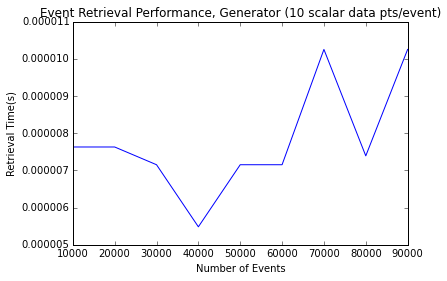

In [8]:
n_elapsed_time = []
n_ev_ct = []
for _ in range(10000, 100000, 10000):
    n_elapsed_time.append(benchmark_events_generator(event_count=_, data_point_count=10))
    n_ev_ct.append(_)
plt.plot(n_ev_ct,  n_elapsed_time)
plt.xlabel('Number of Events')
plt.ylabel('Retrieval Time(s)')
plt.title('Event Retrieval Performance, Generator (10 scalar data pts/event)')

# Large Quantity Event Retrieval Performance, Listified (10 scalar data pts/events)

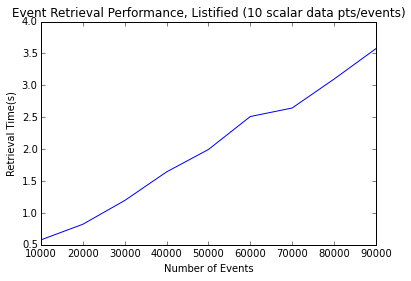

In [9]:
n_elapsed_time = []
n_ev_ct = []
for _ in range(10000, 100000, 10000):
    n_elapsed_time.append(benchmark_list_events(event_count=_, data_point_count=10))
    n_ev_ct.append(_)
plt.plot(n_ev_ct,  n_elapsed_time)
plt.xlabel('Number of Events')
plt.ylabel('Retrieval Time(s)')
plt.title('Event Retrieval Performance, Listified (10 scalar data pts/events)')

# Variation in Retrieval Time w.r.t. Data Points, Listified 1 to 50 data points/event

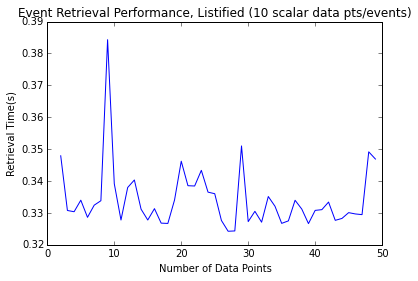

In [10]:
n_elapsed_time = []
n_data_ct = []
for k in range(2, 50, 1):
    n_elapsed_time.append(benchmark_list_events(event_count=2, data_point_count=k))
    n_data_ct.append(k)
plt.plot(n_data_ct,  n_elapsed_time)
plt.xlabel('Number of Data Points')
plt.ylabel('Retrieval Time(s)')
plt.title('Event Retrieval Performance, Listified (10 scalar data pts/events)')

# Variation in Retrieval Time w.r.t. Data Points, Generator 1 to 50 data points/event

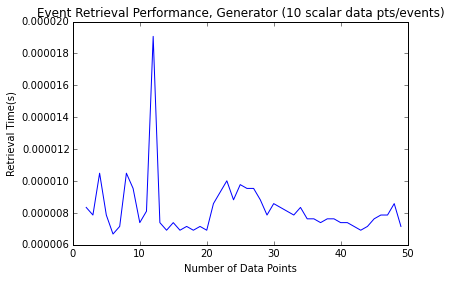

In [11]:
n_elapsed_time = []
n_data_ct = []
for k in range(2, 50, 1):
    n_elapsed_time.append(benchmark_events_generator_single(event_count=2, data_point_count=k))
    n_data_ct.append(k)
plt.plot(n_data_ct,  n_elapsed_time)
plt.xlabel('Number of Data Points')
plt.ylabel('Retrieval Time(s)')
plt.title('Event Retrieval Performance, Generator (10 scalar data pts/events)')